# Stock price prediction using LSTM
LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) architecture designed to handle sequence data and overcome the limitations of traditional RNNs. Will predict stock Price of AAPL(Apple) using LSTM.

* **1.) Explore change in price of the stock over time**
* **2.) Explore the daily return of the stock on average**
* **3.) Check the moving average of the various stocks**
* **4.) Check the correlation between different stocks**
* **5.) Evaluate the value at risk by investing in a particular stock**
* **6.) Predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)**

# **Step 1 - Importing the libraries**



```
# This is formatted as code
```

**Configuration Libraries**

In [1]:
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

**Common Libraries**

In [2]:
#@title import numpy pandas seaborn matplotlib and plotly
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

**Machine Learning Libraries**

In [3]:
#@title Import Keras and sklearn
from sklearn.metrics import *
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
# from keras.preprocessing.sequence import TimeseriesGenerator

**Stock API**

* **Here we are using yfinance: https://pypi.org/project/yfinance/**
* **Ticker symbol docs: https://www.nasdaq.com/market-activity/stocks/screener**

In [4]:
#@title Install kaleido library
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 30.0 MB/s eta 0:00:00


In [5]:
!pip install yfinance
import yfinance as yf

**Grabbing data from YFINANCE**

In [6]:
data = yf.Ticker("AAPL") # For Apple stock

In [7]:
hist = data.history(period = "1mo")

In [8]:
data.info

ERROR:yfinance:401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AAPL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AAPL&crumb=%7B%22finance%22%3A%7B%22result%22%3Anull%2C%22error%22%3A%7B%22code%22%3A%22Unauthorized%22%2C%22description%22%3A%22Invalid+Cookie%22%7D%7D%7D


{'trailingPegRatio': 2.337}

**Converting values into dataframe**

In [9]:
current_date = datetime.now()
start_date = datetime(current_date.year - 1, current_date.month, current_date.day)

data = yf.download("AAPL", start_date, current_date)

[*********************100%***********************]  1 of 1 completed


**Data**

In [10]:
data.head()
data.columns = [f"{col[0]}" for col in data.columns]

In [11]:
data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351761,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [12]:
data.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-12-23,255.270004,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700
2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42317100
2024-12-30,253.119995,253.119995,253.470001,250.750000,252.229996,18926246


**Visualizing the data columns to get a better overview**

In [13]:
fig = px.line(data, x=data.index, y="Close", title='Apple Closing Prices')
fig.show()

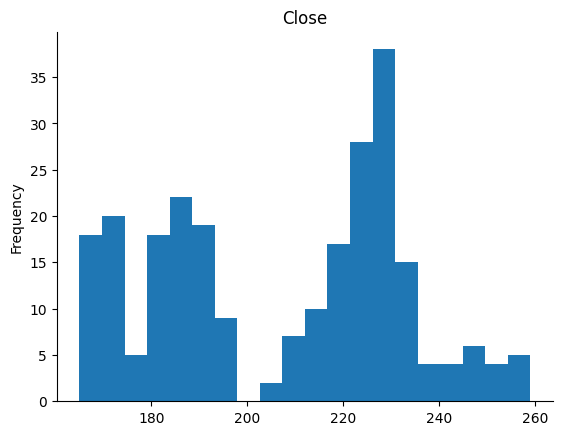

In [14]:
# @title Histogram on Close price

from matplotlib import pyplot as plt
data['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

<hr>

**Data Information**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
 1   Close      251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Open       251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


* **Need to work with the date columns**
* **Moreover, on the weekends since the markets are closed, hence we need to check for that as well.**

**Data Description**

In [16]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,206.599834,207.037410,208.733427,205.040279,206.771115,5.713115e+07
std,25.624499,25.413391,25.477117,25.026478,25.219399,3.093878e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,1.892625e+07
25%,183.418915,184.199997,185.119995,182.180000,183.735001,4.187125e+07
50%,213.757141,214.240005,216.779999,211.919998,213.929993,4.994790e+07
75%,227.088608,227.424995,229.375000,225.110001,227.320000,6.295815e+07
max,259.019989,259.019989,260.100006,257.630005,258.190002,3.186799e+08


# **Step 2 - Information on Closing Prices**

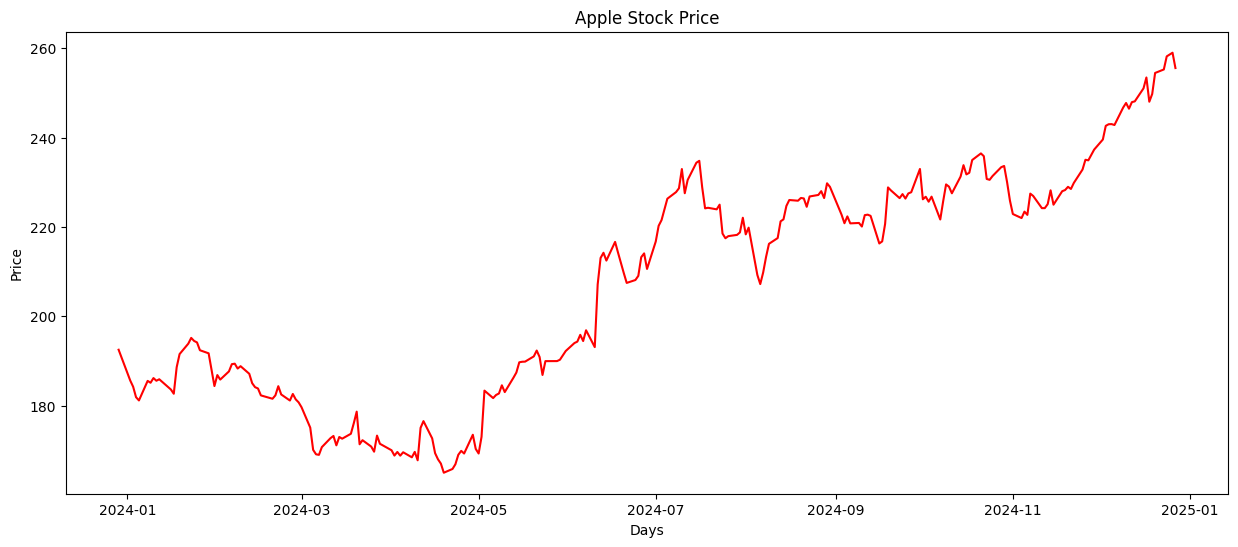

In [18]:
plt.figure(figsize=(15,6))
plt.plot(data.Close, color = "red")
plt.title("Apple Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# **Step 3 - Information on the volumn of the assest sold**
  * **It is the number / quantity of assests sold or traded between daily open and close**

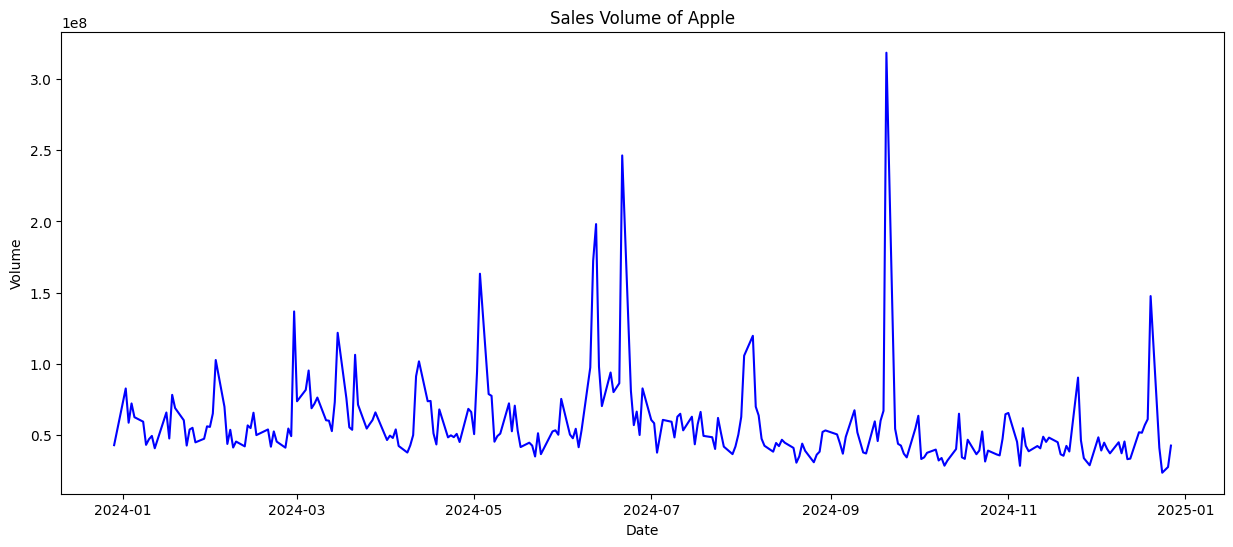

In [19]:
plt.figure(figsize=(15,6))
plt.plot(data.Volume, color = "blue")
plt.title("Sales Volume of Apple")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

<hr>

# **Step 4 - Working with Moving Average**
  * **This will help us find out the updates that were done according to the specified timeframe**

**Finding the MA for the data**

In [20]:
moving_average = [10, 20, 50]

for x in moving_average:
  column_name = f"MA for {x} days"
  data[column_name] = data["Close"].rolling(window = x).mean()

**Visualizing the same**

In [21]:
fig = px.line(data, x=data.index, y=["Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"],
              title="Moving Average for Apple Closing Prices")
fig.show()


**Based on the graph we can say**
  * **The MA taken for 50 days is not able to give us the complete information about the trends, it too smooth with respect to the data**
  * **If we look on to 10 or 20 days MA data, it seems more promising as it captures more information into it**

  * **`We can move forward with MA data having average rolled between 10 or 20 days (Recommendation : 10 days seems more promising)`**

# **Step 5 - Daily Returns of the stock on based on average**
  * **This will let us understand the risk associated with investing in each stock. So, to judge that we have to look onto the daily changes happening with the stock, here absolution won't work**

* **Need to calculate by how much the stocks are changing on daily basis**

In [22]:
data["Daily Returns"] = data["Close"].pct_change()

* **Trying to see the percentage changes over the period of time**

In [23]:
fig = px.line(data, x = data.index, y = "Daily Returns",
              title = "Change in stocks")
fig.show()


**So, here is clear that we are having fluctuations in the terms of change of the close price on daily basis. Trying to take a better look using histogram**

In [24]:
fig = px.histogram(data, x = "Daily Returns",
              title = "Change in stocks")
fig.show()


<hr>

# **Step 6 - How much is the risk in investment**

In [25]:
risk_df = pd.DataFrame(data["Adj Close"].pct_change().dropna())

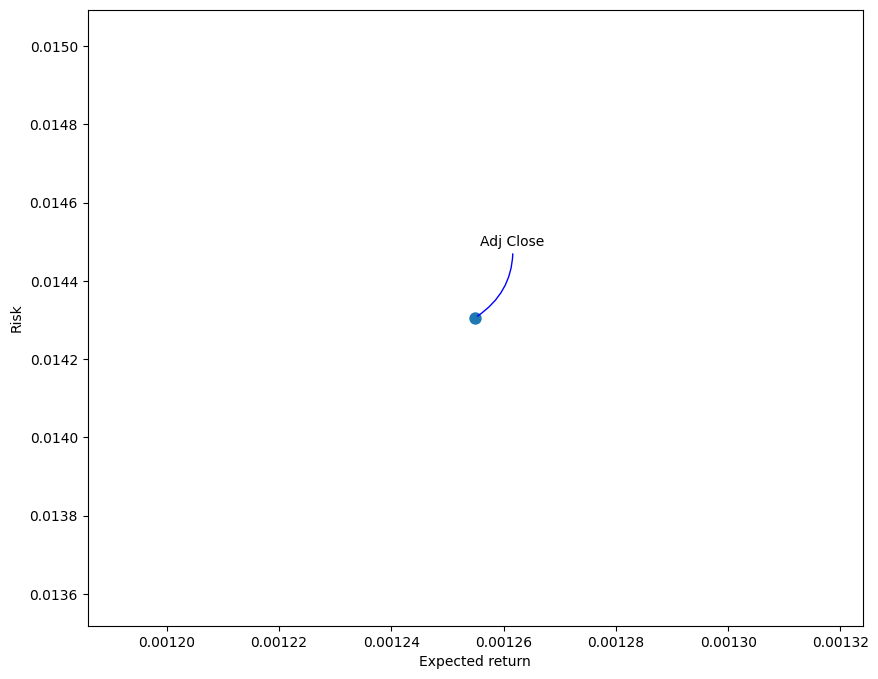

In [26]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(risk_df.mean(), risk_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(risk_df, risk_df.mean(), risk_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

<hr>

# **Step 7 - Working with the training and testing data**

In [27]:
data = yf.download("AAPL", start = "2014-01-01", end = datetime.now())

[*********************100%***********************]  1 of 1 completed


In [28]:
data.head()
data.columns = [f"{col[0]}" for col in data.columns]

In [29]:
fig = px.line(data, x = data.index, y = "Close", title = "Close Price for Apple in Dollars ($)")
fig.show()

**Creating a seperate dataframe that only has Close columns so that we can focus on that only**

In [30]:
df_close = data[["Close"]]

In [31]:
len(df_close)

2766

**Grabbing the number of rows that we need to train**

In [32]:
train_len = int(np.ceil(len(df_close) * 0.95))

In [33]:
train_len

2628

<hr>

# **Step 8 - Working with the predictions on the data**

* **Scaling the values**
  * **It's should to be done seperately on the training and testing data, but since we are practicing right now it's fine. Otherwise look-ahead-bias issue can be there**

In [34]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df_close)

In [35]:
# commonly we would have done something like this
# train_data = scaler.fit_transform(train_data)

In [36]:
pd.DataFrame(data_scaled, columns = ["Scaled Data"])

,Scaled Data
0,0.007900
1,0.006101
2,0.006538
3,0.005962
4,0.006468
...,...
2761,0.981217
2762,0.984451
2763,0.996600
2764,1.000000


# **Step 9 - Splitting the data into training and testing**

* **We need to create the training data**

In [37]:
train_data = data_scaled[0:train_len, :]

* **Splitting the data into training and testing part**

In [38]:
x_train, y_train = [], []

In [39]:
# This loop is creating sequences of 60 data points each from the training data.
# Each sequence represents the past 60 values.
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])


In [40]:
# Converting the both in array format for usability
x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# **LSTM Neural Network**

# **Step 10 - Working with Neural Net**

In [42]:
model = Sequential()
model.add(LSTM(128,
               return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1))

**Compilation**

In [43]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

**Fitting the data**

In [44]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
2568/2568 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0027
Epoch 2/2
2568/2568 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 4.8408e-04


**Testing data creation**

In [45]:
test_data = data_scaled[train_len - 60:, :]

* **Creating the subsets of testing**

In [46]:
x_test = []
y_test = df_close.values[train_len:, :]

* **Creating a sequence of testing data**

In [47]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [48]:
# Converting x_test to array
x_test = np.array(x_test)

In [49]:
# Reshaping for predictions
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Predictions**

In [50]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


**Evaluations**

In [51]:
RMSE = np.sqrt(np.mean((y_test - predictions)**2))

print(f"RMSE: {RMSE}")

RMSE: 4.497973737578853


# **Step 11 - Visualize**

In [52]:
# We have two different data's that is training and testing
train = df_close[ : train_len]

prediction_data = df_close[train_len: ]

prediction_data["Predictions"] = predictions

In [53]:
a = prediction_data["Close"].values

b = prediction_data["Predictions"].values

In [54]:
fig = px.line(train, x=train.index, y= "Close", title = "Final Analysis for Apple")
fig.add_scatter(x=prediction_data.index, y= a, name = "Actual")
fig.add_scatter(x=prediction_data.index, y= b, name = "Predictions")
fig.show()

In [55]:
prediction_data.head()

,Close,Predictions
Date,,
2024-06-12,213.070007,198.647446
2024-06-13,214.240005,205.384308
2024-06-14,212.490005,210.633926
2024-06-17,216.669998,212.591721
2024-06-18,214.289993,214.351974


In [56]:
def evaluate(y_test = y_test, prediction = predictions):
  mse = mean_squared_error(y_test, predictions)
  print("Mean squared error:", mse)
  mae = mean_absolute_error(y_test, predictions)
  print("Mean absolute error:", mae)
  r2 = r2_score(y_test, predictions)
  print("R-squared score:", r2)
  RMSE = np.sqrt(np.mean((y_test - predictions)**2))
  print(f"RMSE: {RMSE}")

In [57]:
evaluate()

Mean squared error: 20.231767743949078
Mean absolute error: 3.6970445937004643
R-squared score: 0.8307778528980461
RMSE: 4.497973737578853


# Make a Python function to predict stock price using ML
* **1.) Download last 1 month stock price from yFinance for a given stock **
* **2.) Data preprocessing**
* **3.) Prepare train-test dataset**
* **4.) Run the model and predict Stock price**
* **5.) Calculate accuracy of that model and plot actual-expected stock price**

In [21]:
#@title Define the function for stock prediction based on last 1 year data
def predict_stock_price(ticker, epochs = 2):
  data = yf.download(ticker, start = "2014-01-01", end = datetime.now())
  df_close = data[["Close"]]
  train_len = int(np.ceil(len(df_close) * 0.95))
  scaler = MinMaxScaler()
  data_scaled = scaler.fit_transform(df_close)
  train_data = data_scaled[0:train_len, :]
  x_train, y_train = [], []
  # This loop is creating sequences of 60 data points each from the training data.
  # Each sequence represents the past 60 values.
  for i in range(60, len(train_data)):
    x_train.append(train_data[i-60 : i, 0])
    y_train.append(train_data[i, 0])
  # Converting the both in array format for usability
  x_train, y_train = np.array(x_train), np.array(y_train)
  # Reshaping the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  model = Sequential()
  model.add(LSTM(128,
                return_sequences = True,
                input_shape = (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences = False))
  model.add(Dense(30))
  model.add(Dense(1))
  model.compile(optimizer = "adam", loss = "mean_squared_error")
  model.fit(x_train, y_train, batch_size = 1, epochs = epochs)
  test_data = data_scaled[train_len - 60:, :]
  x_test = []
  y_test = df_close.values[train_len:, :]
  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  # Converting x_test to array
  x_test = np.array(x_test)
  # Reshaping for predictions
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)
  # Evaluation
  RMSE = np.sqrt(np.mean((y_test - predictions)**2))
  print(f"RMSE: {RMSE}")
  # Visualization
  # We have two different data's that is training and testing
  train = df_close[ : train_len]
  prediction_data = df_close[train_len: ]
  prediction_data["Predictions"] = predictions
  a = prediction_data["Close"].values
  b = prediction_data["Predictions"].values
  print(f"Final Analysis for {ticker}")
  print(f"Size of training data: {len(train)}")
  print(f"Size of testing data: {len(prediction_data)}")
  print(f"Size of a: {len(a)} Size of b: {len(b)}")
  #Print the mean value of a and b
  print(f"Mean value of a: {a.squeeze().mean()} Mean value of b: {b.mean()}")
  # Print RMSE as a percentage of mean value of the actual price a
  print(f"RMSE as a percentage of mean value of the actual price: {RMSE/a.squeeze().mean()*100}%")
  # print the first and last element of both train.index and prediction_data.index
  print(f"first and last element of train.index: {train.index[0]} {train.index[-1]}")
  print(f"first and last element of prediction_data.index: {prediction_data.index[0]} {prediction_data.index[-1]}")
  #print(f"train.index: {train.index}")
  #print(f"prediction_data.index: {prediction_data.index}")
  # Print value of actual data a and prediction data b
  #print(f"Actual data: {a.squeeze()}")
  #print(f"Prediction data: {b}")
  # print first and last elemnt of a and b
  print(f"First element of a: {a.squeeze()[0]} Last element of a: {a.squeeze()[-1]}")
  print(f"First element of b: {b[0]} Last element of b: {b[-1]}")

  # Change here: Squeeze the 'Close' column to ensure it's 1D
  fig = px.line(train, x=train.index, y=train["Close"].squeeze(), title=f"Final Analysis for {ticker}")
  fig.add_scatter(x=prediction_data.index, y=a.squeeze(), name="Actual")
  fig.add_scatter(x=prediction_data.index, y=b, name="Predictions")
  fig.show()
  # Set the width and height for the saved image
  #fig.update_layout(width=1920, height=1080)
  # Use the 'svg' format for maximum quality when zooming
  pio.write_image(fig, f"{ticker}_pred.pdf", scale=6, width=1080, height=1080)
  result_dict = dict()
  result_dict["RMSE"] = RMSE
  result_dict["training_data_size"] = len(train)
  result_dict["testing_data_size"] = len(prediction_data)
  result_dict["stock_price_mean"] = a.squeeze().mean()
  result_dict["prediction_price_mean"] = b.mean()
  result_dict["percentage_RMSE"] = RMSE/a.squeeze().mean()*100
  result_dict["train_duration"] = [train.index[0], train.index[-1]]
  result_dict["prediction_duration"] = [prediction_data.index[0], prediction_data.index[-1]]
  result_dict["fig"] = fig
  return result_dict

In [22]:
#@title Call this function for Microsoft ticker MSFT
result_microsoft = predict_stock_price("MSFT", epochs = 10)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10


2569/2569 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0020
Epoch 2/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 4.8348e-04
Epoch 3/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 3.2126e-04
Epoch 4/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 3.6325e-04
Epoch 5/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 2.0107e-04
Epoch 6/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 2.4502e-04
Epoch 7/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 1.6057e-04
Epoch 8/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 2.3283e-04
Epoch 9/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 1.5863e-04
Epoch 10/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 1.9553e-04


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
RMSE: 6.214861716446837
Final Analysis for MSFT
Size of training data: 2629
Size of testing data: 138
Size of a: 138 Size of b: 138
Mean value of a: 428.4335866734601 Mean value of b: 431.4156799316406
RMSE as a percentage of mean value of the actual price: 1.450600958879451%
first and last element of train.index: 2014-01-02 00:00:00 2024-06-12 00:00:00
first and last element of prediction_data.index: 2024-06-13 00:00:00 2024-12-30 00:00:00
First element of a: 441.5799865722656 Last element of a: 426.7950134277344
First element of b: 442.6377258300781 Last element of b: 434.0809326171875


In [23]:
#@title Call this function for Amazon ticker
result_amazon = predict_stock_price("AMZN", epochs = 10)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10


2569/2569 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0022
Epoch 2/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 4.1239e-04
Epoch 3/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 4.3722e-04
Epoch 4/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 3.0782e-04
Epoch 5/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.3936e-04
Epoch 6/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.3546e-04
Epoch 7/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.1177e-04
Epoch 8/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 2.2326e-04
Epoch 9/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.2494e-04
Epoch 10/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.4620e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
RMSE: 5.592309372070654
Final Analysis for AMZN
Size of training data: 2629
Size of testing data: 138
Size of a: 138 Size of b: 138
Mean value of a: 192.88985542629075 Mean value of b: 188.6736602783203
RMSE as a percentage of mean valu

In [24]:
#@title Call this function for Meta facebook ticker
result_meta = predict_stock_price("META", epochs = 10)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10


2569/2569 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0017
Epoch 2/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.3271e-04
Epoch 3/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.3425e-04
Epoch 4/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.3820e-04
Epoch 5/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.7751e-04
Epoch 6/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.1241e-04
Epoch 7/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.7930e-04
Epoch 8/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.1860e-04
Epoch 9/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.3125e-04
Epoch 10/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.2091e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
RMSE: 17.387065281023837
Final Analysis for META
Size of training data: 2629
Size of testing data: 138
Size of a: 138 Size of b: 138
Mean value of a: 546.9012320698172 Mean value of b: 532.9401245117188
RMSE as a percentage of mean valu

In [25]:
#@title Call this function for Alaphabet Google ticker
result_google = predict_stock_price("GOOG", epochs= 10)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10


2569/2569 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0020
Epoch 2/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 4.9462e-04
Epoch 3/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.1140e-04
Epoch 4/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.7806e-04
Epoch 5/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.0231e-04
Epoch 6/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.1478e-04
Epoch 7/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.2837e-04
Epoch 8/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.9511e-04
Epoch 9/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.2108e-04
Epoch 10/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.3359e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
RMSE: 5.500982701842001
Final Analysis for GOOG
Size of training data: 2629
Size of testing data: 138
Size of a: 138 Size of b: 138
Mean value of a: 173.39815963523975 Mean value of b: 177.99041748046875
RMSE as a percentage of mean val

In [27]:
#@title Call this function for Netflix ticker
result_netflix=predict_stock_price("NFLX", epochs= 10)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10


2569/2569 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0018
Epoch 2/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 4.4450e-04
Epoch 3/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.5795e-04
Epoch 4/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.4353e-04
Epoch 5/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.5378e-04
Epoch 6/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.3702e-04
Epoch 7/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.0744e-04
Epoch 8/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.1617e-04
Epoch 9/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.7321e-04
Epoch 10/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.8739e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE: 14.691560626684709
Final Analysis for NFLX
Size of training data: 2629
Size of testing data: 138
Size of a: 138 Size of b: 138
Mean value of a: 739.2484042402626 Mean value of b: 734.3086547851562
RMSE as a percentage of mean valu

In [28]:
#@title Call this function for Apple ticker
result_apple = predict_stock_price("AAPL", epochs= 10)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10


2569/2569 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0031
Epoch 2/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 4.8260e-04
Epoch 3/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 3.3250e-04
Epoch 4/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.5599e-04
Epoch 5/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.0016e-04
Epoch 6/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.0093e-04
Epoch 7/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.9262e-04
Epoch 8/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.5882e-04
Epoch 9/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.5168e-04
Epoch 10/10
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.2048e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
RMSE: 8.879043780204602
Final Analysis for AAPL
Size of training data: 2629
Size of testing data: 138
Size of a: 138 Size of b: 138
Mean value of a: 227.94121739484262 Mean value of b: 219.61593627929688
RMSE as a percentage of mean val